In [9]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize data
X_train, X_test = X_train / 255.0, X_test / 255.0

# Split into train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert labels to categorical for neural networks
y_train_cat = to_categorical(y_train, 10)
y_val_cat = to_categorical(y_val, 10)
y_test_cat = to_categorical(y_test, 10)

In [10]:
# ANN model
def create_ann():
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),
        layers.Dense(512, activation='relu'),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train ANN
ann_model = create_ann()
ann_history = ann_model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat), batch_size=64)

# Evaluate ANN
train_loss, train_accuracy = ann_model.evaluate(X_train, y_train_cat, verbose=0)
val_loss, val_accuracy = ann_model.evaluate(X_val, y_val_cat, verbose=0)
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test_cat, verbose=0)

print(f'ANN Training Accuracy: (train_accuracy:.4f), Validation Accuracy: (val_accuracy:.4f), Test Accuracy: (test_accuracy:.4f)

SyntaxError: invalid decimal literal (<ipython-input-10-bc2b961298f2>, line 22)

In [11]:
# Flatten the data for SVM
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# SVM model
svm_model = svm.SVC(kernel='linear', C=1.0)

# Train SVM
svm_model.fit(X_train_flat[:5000], y_train[:5000].ravel())  # Subset for faster training

# Evaluate SVM
train_accuracy = accuracy_score(y_train[:5000], svm_model.predict(X_train_flat[:5000]))
val_accuracy = accuracy_score(y_val, svm_model.predict(X_val_flat))
test_accuracy = accuracy_score(y_test, svm_model.predict(X_test_flat))

print(f'SVM Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}')

SVM Training Accuracy: 0.9866, Validation Accuracy: 0.3094, Test Accuracy: 0.3025


In [12]:
# CNN model
def create_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train CNN
cnn_model = create_cnn()
cnn_history = cnn_model.fit(X_train, y_train_cat, epochs=10, validation_data=(X_val, y_val_cat), batch_size=64)

# Evaluate CNN
train_loss, train_accuracy = cnn_model.evaluate(X_train, y_train_cat, verbose=0)
val_loss, val_accuracy = cnn_model.evaluate(X_val, y_val_cat, verbose=0)
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test_cat, verbose=0)

print(f'CNN Training Accuracy: {train_accuracy}, Validation Accuracy: {val_accuracy}, Test Accuracy: {test_accuracy}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 94ms/step - accuracy: 0.2937 - loss: 1.8837 - val_accuracy: 0.5032 - val_loss: 1.3944
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 89ms/step - accuracy: 0.5182 - loss: 1.3397 - val_accuracy: 0.5596 - val_loss: 1.2515
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.5775 - loss: 1.1977 - val_accuracy: 0.5824 - val_loss: 1.1733
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.6174 - loss: 1.0931 - val_accuracy: 0.6262 - val_loss: 1.0535
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 93ms/step - accuracy: 0.6515 - loss: 0.9966 - val_accuracy: 0.6568 - val_loss: 0.9911
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 89ms/step - accuracy: 0.6778 - loss: 0.9236 - val_accuracy: 0.6674 - val_loss: 0.9454
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 91ms/step - accuracy: 0.6930 - loss: 0.8741 - val_accuracy: 0.6693 - val_loss: 0.9501
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.7146 - loss: 0.8199 - 

NameError: name 'ann_history' is not defined

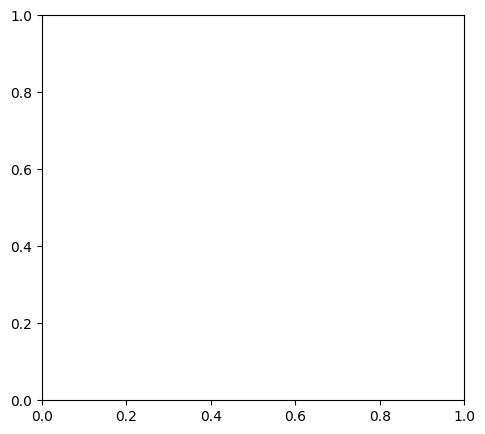

In [13]:
import matplotlib.pyplot as plt

# ANN Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Train Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Train Loss')
plt.plot(ann_history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss')
plt.legend()
plt.show()

# CNN Accuracy and Loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Train Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Train Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.legend()
plt.show()
